##### <img src="../SDSS-Logo.png" style="display:inline; width:500px" />


## Learning Objectives
- Understand dictionaries and how these are used in Data Science
- Write code using dictionaries to model certain data types.


In [3]:
import comp116
import pickle # A Python library for serializing and deserializing objects.
import os
import numpy as np #For numerical operations and handling arrays.
import pandas as pd # For working with data frames and CSV files.

EU_countries = np.array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France'])
EU_countries.flags.writeable = False # makes the EU_countries array immutable (read-only). Any attempt to modify its elements will raise an error.

movie_key = 'title'

df1 = pd.read_csv("Unit-2-5-polling_place_NC_20201103.csv", sep = ',')
county_poll_locations = df1['county_name'] # The column county_name is extracted and stored in the variable county_poll_locations.

# The EU_countries array, movie_key, and county_poll_locations are serialized (saved) as a binary file
# wb: Indicates the file is opened in write-binary mode.
with open('Unit-2-5-Dictionaries.data.pickle', 'wb') as fid:
    pickle.dump((EU_countries, movie_key, county_poll_locations) , fid)

# deleted from memory
del EU_countries,  movie_key, county_poll_locations 

# The objects previously saved in the pickle file are loaded back into memory.
# rb: Indicates the file is opened in read-binary mode.
with open('Unit-2-5-Dictionaries.data.pickle', 'rb') as fid:
    EU_countries, movie_key, county_poll_locations = pickle.load(fid)

print('EU_countries are', EU_countries)
print('Movie key is', movie_key)
print('The county poll locations array has', len(county_poll_locations), 'entries')

EU_countries are ['Austria' 'Belgium' 'Bulgaria' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France']
Movie key is title
The county poll locations array has 2662 entries


## Dictionaries

* Dictionaries are an important data structure in python.
    * Dictionaries are naturally useful in dealing with JSON, which is a widely used standard in Web programming
    * Dictionaries are a key component in pandas, which is python library that is widely used in Data Science
* A python dictionary is a collection of objects which are indexed by a key, which can be any **immutable** python object.
* So the data in a dictionary is organized as a collection of `key`:`value` pair.
* A dictionary is
    * unordered, 
    * changeable 
    * indexed by a key which doesn't have to be an integer.
        * Keys can be a string, tuple, date or any **immutable** object
        * strings like location names
        * tuples like latitude and longitude
     
 * A dictionary can be created 
     * with curly braces `x = {}` 
     * or using the `dict()` keyword.
 
* For more information on dictionaries see:
    * [PLYMI](https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/DataStructures_II_Dictionaries.html)
    * [Official python docs](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)
    * [W3 Schools](https://www.w3schools.com/python/python_dictionaries.asp)

In [5]:
# Two ways of creating an empty dictionary
empty_dictionary = dict()
another_empty_dictionary = {}

if empty_dictionary == another_empty_dictionary:
    print('The two dictionaries are equal')


The two dictionaries are equal


In [6]:
# You can also create the dictionary with the key-value pairs added
dict1 = {'apple':'fruit', 'carrot':'vegetable'}
dict2 = dict([('apple','fruit'), ('carrot','vegetable')])

if (dict1 == dict2):
    print('dict1 and dict2 are equal')

dict1 and dict2 are equal


In [7]:
# You can also create an empty dictionary and add the key value pairs later.
# You use the key as the index for the dictionary.

class_dict = dict()
class_dict['semester'] = 'Fall'
class_dict['year'] = 2020
class_dict['course no'] = 'COMP116'
print('class_dict=',class_dict)


class_dict= {'semester': 'Fall', 'year': 2020, 'course no': 'COMP116'}


In [9]:
# You can iterate through the dictionary using a for loop
for key in class_dict:
    print('For key', key, ',class_dict has value', class_dict[key])

For key semester ,class_dict has value Fall
For key year ,class_dict has value 2020
For key course no ,class_dict has value COMP116


In [10]:
# You can add additional key-value pairs to the dictionary
class_dict['course name'] = 'Introduction to Scientific Programming'
for key in class_dict:
    print('For key', key, ',class_dict has value', class_dict[key])

For key semester ,class_dict has value Fall
For key year ,class_dict has value 2020
For key course no ,class_dict has value COMP116
For key course name ,class_dict has value Introduction to Scientific Programming


In [13]:
# just like for sets, you can add multiple items using update
dict1.update({'banana':'fruit', 'radish':'vegetable'})
for key in dict1:
    print('Key', key, 'is a', dict1[key])

Key apple is a fruit
Key carrot is a vegetable
Key banana is a fruit
Key radish is a vegetable


### Why dictionaries?

* Arrays or lists, as compared to dictionaries, are accessed using the numerical index.

* Dictionary values, on the other hand can be accessed using the key value, which can be much more human friendly.

* As an example,assume you want to put information about movies into Python collections.
    * You have movie title, year it was released, director, etc
    * Compare doing it using lists vs dictionaries


In [15]:
# First as a list
movie1_array = ['Guardians of the galaxy', 2014, 'James Gunn']
print('movie array=', movie1_array)

# Then as a dictionary
movie1_dict = {}
movie1_dict['title'] = 'Guardians of the galaxy'
movie1_dict['year'] = 2014
movie1_dict['director'] = 'James Gunn'
print('movie dictionary=', movie1_dict)

movie array= ['Guardians of the galaxy', 2014, 'James Gunn']
movie dictionary= {'title': 'Guardians of the galaxy', 'year': 2014, 'director': 'James Gunn'}


In [19]:
names = ["Alice", "Bob", "Charlie"]

for index, value in enumerate(names):
    print(f"Index: {index}, Value: {value}")

names = {"Alice": 25, "Bob": 30, "Charlie": 35}
for key, value in names.items():
    print(f"Key: {key}, Value: {value}")

Index: 0, Value: Alice
Index: 1, Value: Bob
Index: 2, Value: Charlie
Key: Alice, Value: 25
Key: Bob, Value: 30
Key: Charlie, Value: 35


In [21]:
# Now suppose you want to access the movie's title
# For a list you need to know that title is the 1st element (0th index) of the array
print('The title is', movie1_array[0])

# For the dictionary, you just need to remember that the movie title is the value for the key title
print('The title is', movie1_dict['title'])

The title is Guardians of the galaxy
The title is Guardians of the galaxy


### Let us try accessing other data

* Set variable `movie1_dict_director` to `movie1_dict` director.

* Set variable `movie1_array_director` to `movie1_array`'s director.

* In the first cell we read in `movie_key` from the pickle file.

* Set variable `movie1_dict_key_value` to `movie_dict`'s value for the key `movie_key`.

* Set variable `movie_array_key_value` to `movie_array`'s value for the key `movie_key`.


#### **Note:** What if we collected hundreds of items for each movie, would it be easy to remember which entry of an array was the director?

In [22]:
print('Movie key is ', movie_key, 'and is of type', type(movie_key))

movie1_dict_director = movie1_dict['director']
movie1_array_director = movie1_array[2]
    
movie1_dict_key_value = movie1_dict[movie_key]
movie_array_key_value = movie1_array[0]


print('The movie director was', movie1_dict_director, movie1_array_director)
print('The movie key\'s value was', movie1_dict_key_value, movie_array_key_value)

Movie key is  title and is of type <class 'str'>
The movie director was James Gunn James Gunn
The movie key's value was Guardians of the galaxy Guardians of the galaxy


In [23]:
# You can define a dictionary with it's keys:

movie2_dict = {
    'title': 'Avengers: Endgame',
    'year': 2019,
    'director': ['Anthony Russo', 'Joe Russo']
}
print('moviedictionary=', movie2_dict)

moviedictionary= {'title': 'Avengers: Endgame', 'year': 2019, 'director': ['Anthony Russo', 'Joe Russo']}


In [24]:
# You can iterate over a dictionary's keys
print('The information we have on', movie1_dict['title'], 'is:')
for key in movie1_dict:
    print('\tkey', key, 'has value', movie1_dict[key])

The information we have on Guardians of the galaxy is:
	key title has value Guardians of the galaxy
	key year has value 2014
	key director has value James Gunn


### Keys don't have to be character strings

* Keys can be anything immutable (i.e. that do not change.)
* So you could use a tuple, which are objects grouped by parenthesis. Tuples are immutable.
* You can't use a list or array as a key because elements within a list can change.
* In assignment 4 you might make the city name be the key to a dictionary of where complaints were issued.  
* Also in assignment 4 you might make the coordinates the key to where a blocked driveway occurred.

 ### Dictionary keys are hashed for quick look up
 #### Becasue they are hashed, they have to be immutable
 
* Hashing is a common approach that is used in Computer Science to speed up searching for something.

* You can check [this page](https://wiki.python.org/moin/DictionaryKeys) to understand why python uses hashes for keys.
 
* A dictionary key is _hashed_ to convert to numerical lookup.
* If a key changes, then its has value also changes, so the simple numerical lookup points to the wrong place.
* This is why an array cannot be used as a key but a tuple can be.

        
<pre>


</pre>

In [25]:
x = [1, 2]
y = x
x[0] = -1
print(x, y )

[-1, 2] [-1, 2]


In [26]:
x=1
y=2
print(hash((x, y)))

try:
    hash([x,y])
except Exception as e:
    print("Hashing a list failed,", e)

print("")

-3550055125485641917
Hashing a list failed, unhashable type: 'list'



In [1]:
# Hash is used here
# only to help you understand why keys have to be immutable
print("hash of 'a' is", hash('a'))
print()

x = [1, 2]
y = x
x[0] = -1
print("Notice when x[0] was changed, so was y[0]", x, y)
print("This is why you cannot use an array as a key.  It can change in a hidden way, and its hash value will change")
print()

#What happens if you try to use a list as a key?
try:
    myDict = {x:  "Chapel Hill"}
except TypeError as e:
    print(e)

# But you can use a tuple as a key
a = 1
b = 2
myDict1 = {(a, b): 'Chapel Hill'}
print('MyDict1 is ', myDict1)

hash of 'a' is -699068648616606769

Notice when x[0] was changed, so was y[0] [-1, 2] [-1, 2]
This is why you cannot use an array as a key.  It can change in a hidden way, and its hash value will change

unhashable type: 'list'
MyDict1 is  {(1, 2): 'Chapel Hill'}


### A key has to have a value before you can reference it.

* You cannot reference a dictionary by a key that has not had a value set yet.

* You can test by using `if key in dict` format

In [ ]:
try:
    x = movie1_dict['non-existent-key'] # causes KeyError
except Exception as e:
    print("Error with accessing,", e)

# We can test to see if the key exists and add it if it does not.
if 'non-existent-key' not in movie1_dict:
    movie1_dict['non-existent-key'] = None 
    
print('movie1_dict is now', movie1_dict)

# Another way to do this is to use the get() method
movie1_dict['New movie'] = movie1_dict.get('New movie', "Dune")
print('movie1_dict is now', movie1_dict)

### Using dictionaries to count characters in an array of strings

#### Strategy to solve countCharacters

 1. Create a dictionary for counting the characters
 1. Iterate over each `string` in `string_list`
    1. Iterate over each character in `string`
       1. If the character was not seen before, set dictionary key's value to zero
       1. Increment the dictionary key's value by one
 1. Return the dictionary
<pre>

</pre>

In [8]:
def countCharacters(string_list):
    '''
    For an array of strings, string_list, create a dictionary that has a key for each character
    in string_list and has a value for the number of occurences of that character.  Return the dictionary.
    
    For example, if string_list is
    ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France'],
    
    countCharacters would return {
    '{'A': 1, 'u': 5, 's': 3, 't': 3, 'r': 6, 'i': 7, 'a': 9, 'B': 2, 'e': 5, 'l': 4, 'g': 2, 'm': 2, 
    'C': 3, 'o': 2, 'y': 1, 'p': 2, 'z': 1, 'c': 3, 'h': 1, ' ': 1, 'R': 1, 'b': 1, 'D': 1, 'n': 5, 
    'k': 1, 'E': 1, 'F': 2, 'd': 1}
    '''
    ret_dict = {}
    # For each string in string list:
    #   For each character in string:
    #       if that character is not a key in ret_dict:
    #            set the key's value to zer
    #       increment ret_dict key char by 1

    for string in string_list:
        for char in string:
            if char not in ret_dict:
                ret_dict[char] = 0
            ret_dict[char] += 1

    return ret_dict

print(countCharacters(EU_countries))

{'A': 1, 'u': 5, 's': 3, 't': 3, 'r': 6, 'i': 7, 'a': 9, 'B': 2, 'e': 5, 'l': 4, 'g': 2, 'm': 2, 'C': 3, 'o': 2, 'y': 1, 'p': 2, 'z': 1, 'c': 3, 'h': 1, ' ': 1, 'R': 1, 'b': 1, 'D': 1, 'n': 5, 'k': 1, 'E': 1, 'F': 2, 'd': 1}


In [9]:
EU_countries

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France'],
      dtype='<U14')

### The Dictionary `get` method can help here

* You can also use the `get` method of a dictionary to test if a key exists and to provide a default value

* `ret_list.get(char, 0)` will get `ret_list[char]` if it exists.
* It will get 0 if it does not exist.


In [ ]:
def countCharacters(string_list):
    '''
    For an array of strings, string_list, create a dictionary that has a key for each character
    in string_list and has a value for the number of occurances of the character.  Return the dictionary
    
    For example, if string_list is
    ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France'],
    
    countCharacters would return {
    '{'A': 1, 'u': 5, 's': 3, 't': 3, 'r': 6, 'i': 7, 'a': 9, 'B': 2, 'e': 5, 'l': 4, 'g': 2, 'm': 2, 
    'C': 3, 'o': 2, 'y': 1, 'p': 2, 'z': 1, 'c': 3, 'h': 1, ' ': 1, 'R': 1, 'b': 1, 'D': 1, 'n': 5, 
    'k': 1, 'E': 1, 'F': 2, 'd': 1}
    '''
    ret_dict = {}
    for string in string_list:
        for char in string:
            ret_dict[char] = ret_dict.get(char, 0) + 1
    return ret_dict

print(countCharacters(EU_countries))

### Revisit the county poll locations problem:

* Write a function called `pollingLocationCountsDict` that given a numpy string array of county names with polling locations, returns a dictionary with county names as key and  the number of polling locations in that county as the key value.

In [4]:
def pollingLocationCountsDict(names):
    '''
    Given a Python array of county names, returns a dictionary of the unique
    counties as key and the number of polling locations in each county as value
    '''
    # Unique counties and number of polling locations
    poll_loc_count = {}
    for county in names:
        poll_loc_count[county] = poll_loc_count.get(county, 0) + 1

    return poll_loc_count

polling_locations_count_dict = pollingLocationCountsDict(county_poll_locations)
print(polling_locations_count_dict)

{'ALAMANCE': 38, 'ALEXANDER': 10, 'ALLEGHANY': 4, 'ANSON': 9, 'ASHE': 17, 'AVERY': 19, 'BEAUFORT': 21, 'BERTIE': 12, 'BLADEN': 17, 'BRUNSWICK': 25, 'BUNCOMBE': 80, 'BURKE': 33, 'CABARRUS': 39, 'CALDWELL': 20, 'CAMDEN': 3, 'CARTERET': 26, 'CASWELL': 9, 'CATAWBA': 40, 'CHATHAM': 18, 'CHEROKEE': 16, 'CHOWAN': 6, 'CLAY': 9, 'CLEVELAND': 21, 'COLUMBUS': 26, 'CRAVEN': 21, 'CUMBERLAND': 75, 'CURRITUCK': 11, 'DARE': 16, 'DAVIDSON': 43, 'DAVIE': 14, 'DUPLIN': 19, 'DURHAM': 57, 'EDGECOMBE': 21, 'FORSYTH': 101, 'FRANKLIN': 18, 'GASTON': 46, 'GATES': 6, 'GRAHAM': 4, 'GRANVILLE': 15, 'GREENE': 10, 'GUILFORD': 165, 'HALIFAX': 19, 'HARNETT': 13, 'HAYWOOD': 29, 'HENDERSON': 35, 'HERTFORD': 13, 'HOKE': 15, 'HYDE': 7, 'IREDELL': 29, 'JACKSON': 13, 'JOHNSTON': 36, 'JONES': 7, 'LEE': 10, 'LENOIR': 22, 'LINCOLN': 23, 'MACON': 15, 'MADISON': 12, 'MARTIN': 13, 'MCDOWELL': 17, 'MECKLENBURG': 195, 'MITCHELL': 9, 'MONTGOMERY': 14, 'MOORE': 26, 'NASH': 24, 'NEW HANOVER': 43, 'NORTHAMPTON': 13, 'ONSLOW': 24, 'ORA

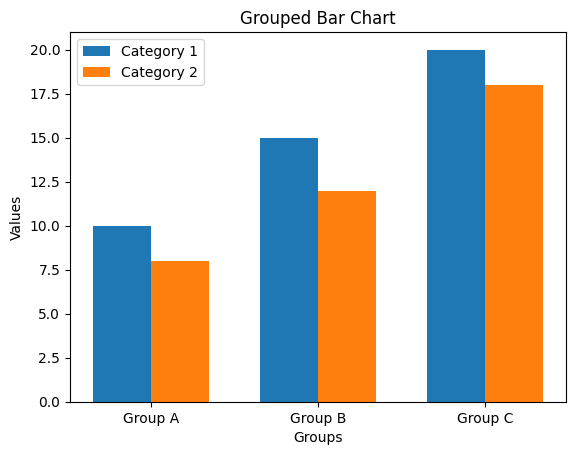

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

# Sample Data
groups = ['Group A', 'Group B', 'Group C']
values1 = [10, 15, 20]
values2 = [8, 12, 18]

# Create a figure and a gridspec
fig = plt.figure()
gs = gridspec.GridSpec(1, 1)

# Create an axes within the gridspec
ax = fig.add_subplot(gs[0])

# Set the width of the bars
bar_width = 0.35

# Create the grouped bar chart
index = np.arange(len(groups))
bar1 = ax.bar(index, values1, bar_width, label='Category 1')
bar2 = ax.bar(index + bar_width, values2, bar_width, label='Category 2')

# Add labels and title
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(groups)
ax.legend()

# Display the plot
plt.show()